In [20]:
# USER'S CHOICE

# for all the paths, do not add the final slash

# you should keep everything in the same main folder : 
project_path = ""  

# where the masks are : 
mask_result_path = project_path + ""

#where the masks, sorted per species are : 
sorted_mask_result_path = project_path + ""




### here is a complete example 


project_path = "/Users/camille/Documents/project plants"

mask_result_path = "/Users/camille/Documents/project plants/intermediate_results/masks"

sorted_mask_result_path = "/Users/camille/Documents/project plants/intermediate_results/sorted_masks"





In [21]:
# All imports

import napari
import tifffile
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from tifffile import imread
from skimage import measure 
from skimage.morphology import convex_hull_image
from skimage.util import map_array
from skimage.measure import label, regionprops, regionprops_table

# import the functions created in the associated .py file
from src.cell_expansion import convex_hull_perimeter, parametric_map, measure_per_species

# Creating the dataframes (with area, lobeyness and species names)

In [22]:
# we use the function that creates a dataframe with the lobeyness and area information 
# for each to create a separate dataframe for each species

# we also put the appropriate name for each species id

df_3_15 = measure_per_species(f"{sorted_mask_result_path}/3-15", 'Rosa_mollis')
df_4_01 = measure_per_species(f"{sorted_mask_result_path}/4-01", 'Persicaria_virginiana')
df_4_02 = measure_per_species(f"{sorted_mask_result_path}/4-02", 'Polygonum_chinense')
df_4_17 = measure_per_species(f"{sorted_mask_result_path}/4-17", 'Aconitum_carmichaelii')
df_5_20 = measure_per_species(f"{sorted_mask_result_path}/5-20", 'Succisella_inflexa')
df_6_21 = measure_per_species(f"{sorted_mask_result_path}/6-21", 'Galium_odoratum')
df_7_01 = measure_per_species(f"{sorted_mask_result_path}/7-01", 'Danae_racemosa')
df_7_15 = measure_per_species(f"{sorted_mask_result_path}/7-15", 'Rohdea_japonica')
df_7_24 = measure_per_species(f"{sorted_mask_result_path}/7-24", 'Hemerocallis_fulva')
df_8_06 = measure_per_species(f"{sorted_mask_result_path}/8-06", 'Jasminum fruticans')

# Concatenating the different dataframes

In [23]:
# we create three dataframe regrouping first all the data for all the species (data), then the four first species
# called (data_1) and the last five (data_2)

# we create those different dataframes to be able later to do separate plots that will help the visualization

data = pd.concat([df_3_15,df_4_01, df_4_02, df_4_17, df_5_20, df_6_21, df_7_01, df_7_15, df_7_24, df_8_06]).reset_index(drop = True)

data_1 = pd.concat([df_3_15,df_4_01, df_4_02, df_4_17, df_5_20]).reset_index(drop = True)

data_2 = pd.concat([df_6_21, df_7_01, df_7_15, df_7_24, df_8_06]).reset_index(drop = True)

#  Cleaning the data 

#### We clean the data from absurd lobeyness values : 
- higher than 1.5 
- lower than 0.99

In [24]:
data_clean = data[(data['lobeyness'] <= 1.5) & (data['lobeyness'] >= 0.99 )]
data_clean_1 = data_1[(data_1['lobeyness'] <= 1.5) & (data_1['lobeyness'] >= 0.99 )]
data_clean_2 = data_2[(data_2['lobeyness'] <= 1.5) & (data_2['lobeyness'] >= 0.99 )]

# Creating the plots

### Violin plots ( figure A from the paper ) 

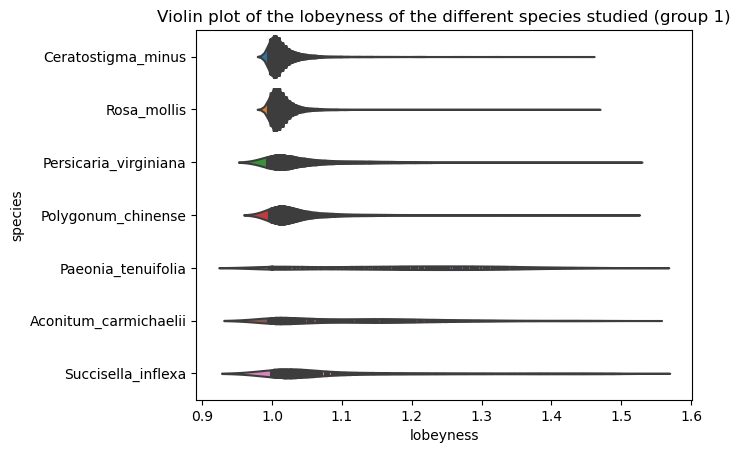

In [25]:
# for the first group of species
sns.violinplot(data = data_clean_1, y = "species", x = "lobeyness", inner = "stick").set(title = 'Violin plot of the lobeyness of the different species studied (group 1)')
plt.show()

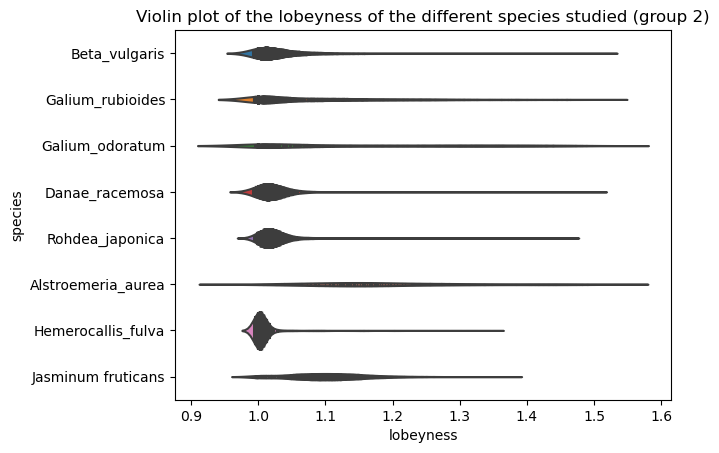

In [26]:
# for the second group of species
sns.violinplot(data = data_clean_2, y = "species", x = "lobeyness", inner = "stick").set(title = 'Violin plot of the lobeyness of the different species studied (group 2)')
plt.show()

### Scatterplot (figure C from the paper )

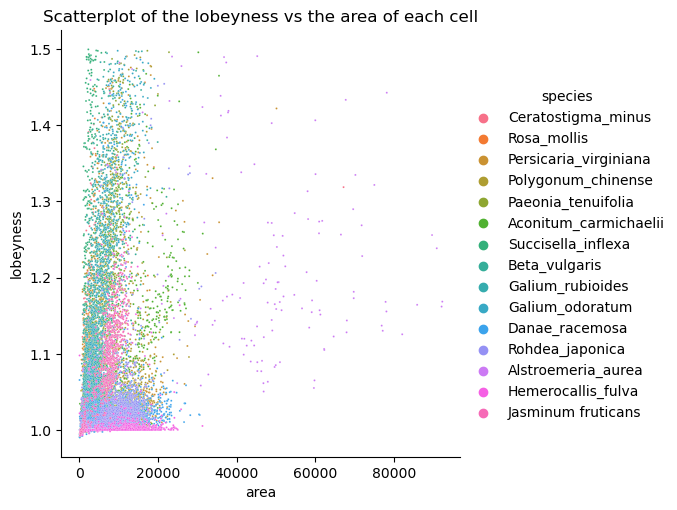

In [27]:
sns.relplot(data = data_clean, x="area",y="lobeyness",hue="species",s=2).set(title="Scatterplot of the lobeyness vs the area of each cell")
plt.show()

# Intermediate values : lobeyness on a parametric map (on one image)

In [28]:
# Because it would be too long to show the lobeyness on a parametric map for each image, you can use the function
# parametric_map(mask_result_path, image_name) to have an example : it will open a napari viewer as well as the 
# image with the corresponding parametric map for lobeyness. You can use it for any masks.

In [28]:
#example
parametric_map(mask_result_path, '4-17-400x-2-03.tif')